# Traffic Signs Classification

This notebook consists of the following topics:

- About Dataset
- Import Libraries
- Loading Data
- Data Processing
- Visualization
- Reshaping
- CNN Model
- Compiling the Model
- Fitting
- Evaluating

## About Dataset

The dataset to be used in this notebook consists of 86989 train images, 12630 test images, and 4410 validation traffic sign images. The images in the dataset are 32x32 in size and have rgb color channel.

![](http://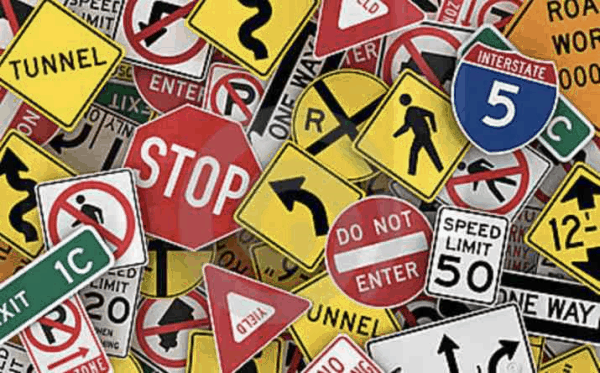)

## Import Libraries

In [ ]:
import pandas as pd
import tensorflow as tf
import keras
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from keras.models import Sequential
from keras.applications import InceptionV3
from keras.utils import to_categorical
from keras.layers import Dense, Flatten,BatchNormalization, Dropout, Lambda, Conv2D, MaxPool2D
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import cv2

## Loading Data

In [ ]:
data = pd.read_pickle("../input/traffic-signs-preprocessed/data8.pickle")


## Data Processing

In [ ]:
data.keys()

In [ ]:
print("x train shape:", data["x_train"].shape)
print("y train shape:", data["y_train"].shape)
print("x test shape:", data["x_test"].shape)
print("y test shape:", data["y_test"].shape)
print("x validation shape:", data["x_validation"].shape)
print("y validation shape:", data["y_validation"].shape)

In [ ]:
x_train = data["x_train"]
x_test = data["x_test"]
x_val = data["x_validation"]
y_train = data["y_train"]
y_val = data["y_validation"]

In [ ]:
x_train = x_train.swapaxes(1,2)
x_train.shape

In [ ]:
x_train = x_train.swapaxes(2,3)
x_train.shape

In [ ]:
x_val = x_val.swapaxes(1,2)
x_val = x_val.swapaxes(2,3)
print("x val shape:", x_val.shape)

## Visualization

In [ ]:
plt.figure(figsize=(10,10)) 

for i in range(16):
    plt.subplot(4,4,i+1)   
    plt.imshow(x_train[i], cmap = "gray")
    plt.axis("off")

plt.show()

In [ ]:
img_list = [1,2,17]
for i in img_list:
    plt.imshow(x_train[i],cmap = "gray")
    plt.axis("off")
    plt.show()

## Reshaping

In [ ]:
def resize(img):
    numberofImage = img.shape[0]
    new_array = np.zeros((numberofImage,64,64,1))
    for i in range(numberofImage):
        new_array[i] = tf.image.resize(img[i],(64,64))
    return new_array

In [ ]:
x_train_resized = resize(x_train)
x_val_resized = resize(x_val)
print("x train resized shape:", x_train_resized.shape)
print("x validation resized shape:", x_val_resized.shape)

In [ ]:
NumberofClass = 43
y_train = to_categorical(y_train, num_classes = NumberofClass)
y_val = to_categorical(y_val, num_classes = NumberofClass)

In [ ]:
plt.imshow(x_train[2], cmap = "gray")
plt.title("32x32 Image")
plt.axis("off")
plt.show()

plt.figure()

plt.imshow(x_train_resized[2], cmap = "gray")
plt.title("64x64 Image")
plt.axis("off")
plt.show()


## CNN Model

In [ ]:

model = Sequential()


model.add(Conv2D(filters = 128, kernel_size = (4,4), padding = "Same", activation = "relu", input_shape = (64,64,1)))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size = (4,4), padding = "Same", activation = "relu" ))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 32, kernel_size = (4,4), padding = "Same", activation = "relu" ))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 16, kernel_size = (4,4), padding = "Same", activation = "relu" ))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(units = 512, activation = "relu"))

model.add(Dropout(0.5))

model.add(Dense(units = NumberofClass, activation = "softmax"))


## Compiling the Model

In [ ]:
model.compile(optimizer = "rmsprop", loss = "categorical_crossentropy", metrics = ["accuracy"])

## Fitting 

In [ ]:
hist = model.fit(x_train_resized, y_train, batch_size = 512,
                    epochs = 10, validation_data = (x_val_resized, y_val))



## Evaluating

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize=(6,6))
plt.plot(hist.history['loss'], color='b', label="Training loss")
plt.plot(hist.history['val_loss'], color='r', label="Validation loss")
plt.legend()
plt.show()

plt.figure()

plt.figure(figsize=(6,6))
plt.plot(hist.history['accuracy'], color='b', label="Training accuracy")
plt.plot(hist.history['val_accuracy'], color='r',label="Validation accuracy")
plt.legend()
plt.show()